In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
#Upload train and val label data set file from local to colabs area
uploaded = files.upload()

In [2]:
# Load Train and val label dataset
train_and_val_label = pd.read_csv("train_and_val_Labels.csv", index_col=0)
train_and_val_label.reset_index()
train_and_val_label.head(5).append(train_and_val_label.tail(5))

,85
0,
1,92
2,86
3,87
4,88
5,93
4995,86
4996,83
4997,88
4998,93


In [ ]:
#Upload train data set file from local to colabs area
uploaded = files.upload()

In [3]:
# Load Train dataset
train_and_val_df = pd.read_csv("train_and_val_Data.csv", index_col=0)
train_and_val_df.head(5).append(train_and_val_df.tail(5))

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2974,0.0.2975,0.0.2976,0.0.2977,0.0.2978,0.0.2979,0.0.2980,0.0.2981,0.0.2982,0.0.2983
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Upload feature types file from local to colabs area
uploaded = files.upload()

In [4]:
# Load feature types
feature = pd.read_csv('featureTypes.txt', header=None)
print(feature)

                                 0
0     flavors raspberries cherries
1                     cherry cocoa
2                        age years
3                        different
4                        marmalade
5                            ready
6                           darker
7                       long spicy
8                            grass
9                    wine finishes
10                      table wine
11                      flamboyant
12                          thirds
13                   fruit sourced
14                         citrusy
15                           means
16                     highlighted
17                  grippy tannins
18                 jammy raspberry
19                   shows flavors
20                            wild
21                      fruit wine
22                           sharp
23                      wine price
24                           feral
25                         upfront
26                             fat
27                 w

In [5]:
train_and_val_label['85'].min(), train_and_val_label['85'].max(), train_and_val_label['85'].mean()

(80, 99, 87.91138227645529)

In [6]:
train_and_val_df.head(2)

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2974,0.0.2975,0.0.2976,0.0.2977,0.0.2978,0.0.2979,0.0.2980,0.0.2981,0.0.2982,0.0.2983
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_and_val_df['0.0'].sum(), train_and_val_df['0.0'].unique()

(0.583, array([0.   , 0.209, 0.174, 0.2  ]))

In [8]:
train_and_val_df.loc[2520].sum() , train_and_val_df.iloc[2520].sum()

(5.664, 6.468999999999999)

In [9]:
#Control summary of train dataset rows summation
for index in range(1, 100):
  print(train_and_val_df.loc[index].sum(),"****************",  train_and_val_df.loc[index].min(),"****************",  train_and_val_df.loc[index].max())

4.836 **************** 0.0 **************** 0.312
4.26 **************** 0.0 **************** 0.426
4.807 **************** 0.0 **************** 0.209
5.184000000000001 **************** 0.0 **************** 0.192
5.576999999999999 **************** 0.0 **************** 0.338
6.4350000000000005 **************** 0.0 **************** 0.28600000000000003
5.096 **************** 0.0 **************** 0.196
5.096 **************** 0.0 **************** 0.196
3.4679999999999995 **************** 0.0 **************** 0.289
5.814 **************** 0.0 **************** 0.171
4.351 **************** 0.0 **************** 0.229
5.663999999999999 **************** 0.0 **************** 0.177
5.007 **************** 0.0 **************** 0.333
5.664 **************** 0.0 **************** 0.177
5.096 **************** 0.0 **************** 0.196
6.4350000000000005 **************** 0.0 **************** 0.28600000000000003
4.896 **************** 0.0 **************** 0.204
3.7380000000000004 **************** 0.0 ********

In [10]:
#Control summary of train dataset column summation
for index in range(1, 100):
  print(train_and_val_df.iloc[index].sum(),"****************",  train_and_val_df.loc[index].min(),"****************",  train_and_val_df.loc[index].max())

4.26 **************** 0.0 **************** 0.312
4.807 **************** 0.0 **************** 0.426
5.184000000000001 **************** 0.0 **************** 0.209
5.576999999999999 **************** 0.0 **************** 0.192
6.4350000000000005 **************** 0.0 **************** 0.338
5.096 **************** 0.0 **************** 0.28600000000000003
5.096 **************** 0.0 **************** 0.196
3.4679999999999995 **************** 0.0 **************** 0.196
5.814 **************** 0.0 **************** 0.289
4.351 **************** 0.0 **************** 0.171
5.663999999999999 **************** 0.0 **************** 0.229
5.007 **************** 0.0 **************** 0.177
5.664 **************** 0.0 **************** 0.333
5.096 **************** 0.0 **************** 0.177
6.4350000000000005 **************** 0.0 **************** 0.196
4.896 **************** 0.0 **************** 0.28600000000000003
3.7380000000000004 **************** 0.0 **************** 0.204
4.807 **************** 0.0 ********

In [11]:
train_and_val_df.iloc[1].sum(), train_and_val_df.iloc[1].unique()

(4.26, array([0.   , 0.213, 0.426]))

In [12]:
#Define mape method
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
feature.iloc[2999] , len(feature)

(0    stews
 Name: 2999, dtype: object, 3000)

In [15]:
train_df = train_and_val_df.copy()
target = train_and_val_label.copy()

In [16]:
train_df.shape, target.shape

((4999, 3000), (4999, 1))

In [18]:
train_df.head(2)

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2974,0.0.2975,0.0.2976,0.0.2977,0.0.2978,0.0.2979,0.0.2980,0.0.2981,0.0.2982,0.0.2983
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
train_df.shape

(4999, 3000)

In [20]:
fl = feature.values
fd=fl.ravel().tolist()

In [21]:
len(fd)

3000

In [22]:
train_df2 = train_df.copy()

In [23]:
#train_df2['85'].head(2)

In [24]:
train_df2.columns

Index(['0.0', '0.0.1', '0.0.2', '0.0.3', '0.0.4', '0.0.5', '0.0.6', '0.0.7',
       '0.0.8', '0.0.9',
       ...
       '0.0.2974', '0.0.2975', '0.0.2976', '0.0.2977', '0.0.2978', '0.0.2979',
       '0.0.2980', '0.0.2981', '0.0.2982', '0.0.2983'],
      dtype='object', length=3000)

In [25]:
train_df2.columns = fd

In [26]:
train_df2.shape

(4999, 3000)

In [27]:
train_df2.head(2)

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,quaffable,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
train_df2 = pd.merge(train_df2, target, left_on=["0"], right_on=["0"], how='left')

In [30]:
#train_df2 = train_df2.drop('score', axis=1)
train_df2['score'].head(2)

0
1    0.0
2    0.0
Name: score, dtype: float64

In [31]:
train_df2.head(2)

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews,85
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86


In [32]:
train_df2 = train_df2.rename(columns={"85": "label_score"})
train_df2.head(2)

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews,label_score
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86


In [33]:
train_df2.shape

(4999, 3001)

In [34]:
#Calculate correlations
corr = train_df2.corr()
corr

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews,label_score
flavors raspberries cherries,1.000000,-0.001375,-0.000936,-0.001499,-0.003030,-0.002599,-0.001025,-0.001494,-0.001133,-0.003007,...,-0.001644,-0.002437,-0.002924,-0.001712,-0.003714,-0.003846,-0.001134,-0.001282,-0.001085,0.011481
cherry cocoa,-0.001375,1.000000,-0.002157,-0.003452,0.021992,-0.005986,-0.002362,-0.003440,-0.002611,0.016781,...,0.052535,-0.005614,0.022459,0.045746,-0.008555,-0.008858,-0.002613,-0.002953,-0.002499,0.049069
age years,-0.000936,-0.002157,1.000000,-0.002351,0.014173,-0.004076,-0.001608,-0.002342,-0.001778,-0.004715,...,-0.002579,-0.003822,-0.004586,-0.002686,-0.005825,-0.006031,-0.001779,-0.002011,-0.001701,0.002804
different,-0.001499,-0.003452,-0.002351,1.000000,-0.007608,0.012286,-0.002574,-0.003750,-0.002846,-0.007548,...,-0.004129,-0.006119,-0.007341,-0.004299,-0.009324,-0.009655,-0.002848,-0.003219,-0.002724,-0.013495
marmalade,-0.003030,0.021992,0.014173,-0.007608,1.000000,-0.013191,-0.005204,-0.007581,-0.005753,-0.002646,...,0.011237,-0.012371,-0.004449,-0.008692,-0.012497,-0.011566,-0.005757,-0.006508,-0.005506,0.009995
ready,-0.002599,-0.005986,-0.004076,0.012286,-0.013191,1.000000,-0.004463,0.030305,-0.004934,0.003395,...,-0.007158,-0.010609,-0.012728,-0.007454,-0.016167,-0.005575,0.024590,-0.005581,-0.004722,0.040503
darker,-0.001025,-0.002362,-0.001608,-0.002574,-0.005204,-0.004463,1.000000,-0.002565,-0.001947,-0.005164,...,-0.002824,-0.004186,-0.005022,-0.002941,-0.006379,0.016012,-0.001948,-0.002202,-0.001863,-0.036634
long spicy,-0.001494,-0.003440,-0.002342,-0.003750,-0.007581,0.030305,-0.002565,1.000000,-0.002836,-0.007522,...,-0.004114,-0.006098,-0.007315,-0.004284,-0.009292,-0.009621,-0.002838,-0.003208,-0.002714,0.025809
grass,-0.001133,-0.002611,-0.001778,-0.002846,-0.005753,-0.004934,-0.001947,-0.002836,1.000000,-0.005708,...,-0.003122,-0.004627,-0.005552,-0.003251,0.040756,-0.007301,-0.002154,-0.002434,-0.002060,-0.020134
wine finishes,-0.003007,0.016781,-0.004715,-0.007548,-0.002646,0.003395,-0.005164,-0.007522,-0.005708,1.000000,...,0.006772,0.004161,-0.014726,-0.008624,-0.002491,-0.011416,-0.005712,-0.006457,-0.005463,0.011361


In [35]:
cr = corr.copy()

In [36]:
top_corr_columns = []

In [37]:
#Determine best correlate columns over 0.09
top_corr_columns = cr.loc[:, 'label_score'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.09]#.sort_values(ascending=False)
len(best_accurate_columns)

83

In [38]:
top_corr_columns.iloc[2]

0.0028037253931331757

In [39]:
type(top_corr_columns)

pandas.core.series.Series

In [40]:
best_accurate_columns

wonderful                   0.106565
robust                      0.097134
infused                     0.137738
new french                  0.119349
currants chocolate          0.138987
obvious                     0.177490
medium bodied palate        0.099893
layer                       0.095995
flavors balanced            0.170673
blend cabernet              0.132000
cola sandalwood             0.105008
little heavy                0.180928
powerfully                  0.105676
merlot                      0.106241
modern                      0.115365
pineapple orange            0.128138
grenache syrah mourvedre    0.123452
red                         0.162666
price dry                   0.131045
dry medium bodied           0.138736
closed                      0.095286
pure varietal               0.101757
little soft                -0.113230
relatively                 -0.108289
impresses                   0.120534
roughly                     0.092755
vanilla custard            -0.130192
o

In [41]:
train_df3 = train_df2[best_accurate_columns.keys()]

In [42]:
train_df3.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff,knit
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
train_df2.head(2)

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews,label_score
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86


In [44]:
important_columns = ['stuff', 'currant cola', 'little heavy', 'obvious', 'flavors balanced', 'red', 'tough', 'currants dark chocolate', 'currants chocolate', 'dry medium bodied', 'buried']
column_color = ['green', 'yellow', 'brown', 'orange', 'black', 'red', 'purple', 'pink', 'black', 'cyan', 'magenta']

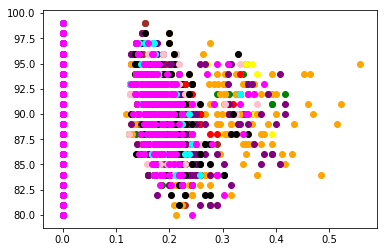

In [46]:
i=0
for column in important_columns:
  plt.scatter(train_df3.loc[:,column], train_df2.loc[:,"label_score"], c=column_color[i])
  i = i+1

In [59]:
cond1 = train_df3.obvious < 0.5
cond2 = train_df2.label_score < 97.5

In [68]:
train_df_exp = train_df3[(cond1) & (cond2)]

In [69]:
train_df_exp.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff,knit
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
train_df_exp.loc[:,column].shape, train_df2.loc[:,"label_score"].shape, len(train_df2.label_score < 97.5)

((4991,), (4999,), 4999)

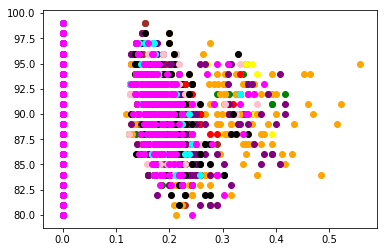

In [73]:
i=0
for column in important_columns:
  plt.scatter(train_df3.loc[:,column], train_df2.loc[:,"label_score"], c=column_color[i])
  i = i+1

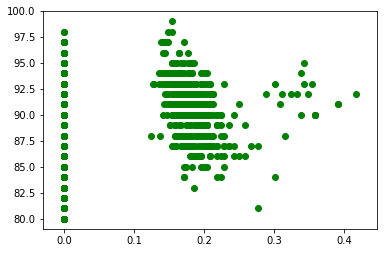

In [79]:
plt.scatter(train_df3.loc[:,"stuff"], train_df2.loc[:,"label_score"], c='green')

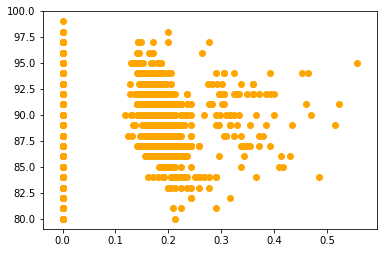

In [81]:
plt.scatter(train_df3.loc[:,"obvious"], train_df2.loc[:,"label_score"], c='orange')

In [82]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1 to 4999
Data columns (total 83 columns):
wonderful                   4999 non-null float64
robust                      4999 non-null float64
infused                     4999 non-null float64
new french                  4999 non-null float64
currants chocolate          4999 non-null float64
obvious                     4999 non-null float64
medium bodied palate        4999 non-null float64
layer                       4999 non-null float64
flavors balanced            4999 non-null float64
blend cabernet              4999 non-null float64
cola sandalwood             4999 non-null float64
little heavy                4999 non-null float64
powerfully                  4999 non-null float64
merlot                      4999 non-null float64
modern                      4999 non-null float64
pineapple orange            4999 non-null float64
grenache syrah mourvedre    4999 non-null float64
red                         4999 non-null f

In [110]:
train_df3.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff,knit
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df4 = pd.DataFrame()

In [112]:
#df.count() does not include NaN values
train_df4 = train_df2[[column for column in train_df4 if train_df4[column].count() / len(train_df4) >= 0.3]]
#del df2[0]
print("List of dropped columns:", end=" ")
for c in train_df4.columns:
    if c not in train_df4.columns:
        print(c, end=", ")
print('\n')


List of dropped columns: 



In [113]:
train_df4.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff,knit
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
pip install sns

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [116]:
import seaborn as sns

count    4999.000000
mean        7.911382
std         3.394018
min         0.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        19.000000
Name: label_score, dtype: float64


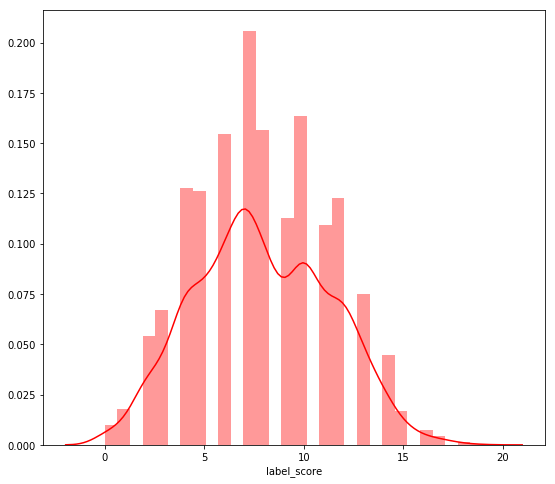

In [117]:
print(train_df2['label_score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df2['label_score'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [118]:
df_num = train_df2.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews,label_score
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


In [119]:
import operator

In [120]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is Label_score
    tmpDf = df_num[[df_num.columns[i], 'label_score']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['label_score'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

flavors acidity: -0.9912407071619305
          touch: -0.9819805060619659
        opulent: -0.9732508152131344
    contributes: -0.9572368748248786
           meld: -0.9568575197527688
        solidly: -0.9558209219942843
        angular: -0.9529888565771234
    rich creamy: -0.9444023386917325
          mouth: -0.9378900839862111
       big ripe: -0.9351692042447769
         butter: -0.9326027615582917
       flavored: -0.927357719912762
         tinged: -0.9254745206039966
 cassis liqueur: -0.9237152324921265
   floods mouth: -0.9237152324921265
      minerally: -0.9179820975914896
bordeaux style blend: -0.9162015315463026
          spine: -0.9158941745127098
      sweetened: -0.9128709291752769
          stony: -0.909907025388407
          taste: -0.9063386230493651
           roll: -0.9036712729555328
   complex wine: -0.8998724127936761
long spicy finish: -0.898941446200402
           half: -0.8982440591297343
    medium body: -0.8966119804454218
   herb flavors: -0.89435801882304

In [121]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.9]
print("There is {} strongly correlated values with Label Score:\n{}".format(len(golden_features_list), golden_features_list))

There is 50 strongly correlated values with Label Score:
['flavors acidity', 'touch', 'opulent', 'contributes', 'meld', 'solidly', 'angular', 'rich creamy', 'mouth', 'big ripe', 'butter', 'flavored', 'tinged', 'cassis liqueur', 'floods mouth', 'minerally', 'bordeaux style blend', 'spine', 'sweetened', 'stony', 'taste', 'roll', 'bordeaux', 'prime', 'tempranillo', 'fare', 'cheese', 'sweet simple', 'fruit wine', 'tart fruit', 'easy drink', 'pretty tannic', 'easy drinking', 'notes', 'benefit', 'mature', 'alcohol', 'nutty', 'blends', 'flavors finish', 'wine quite', 'regular', 'grain', 'sweet jammy', 'single', 'plum', 'cherries red', 'compact', 'surprise', 'sort']


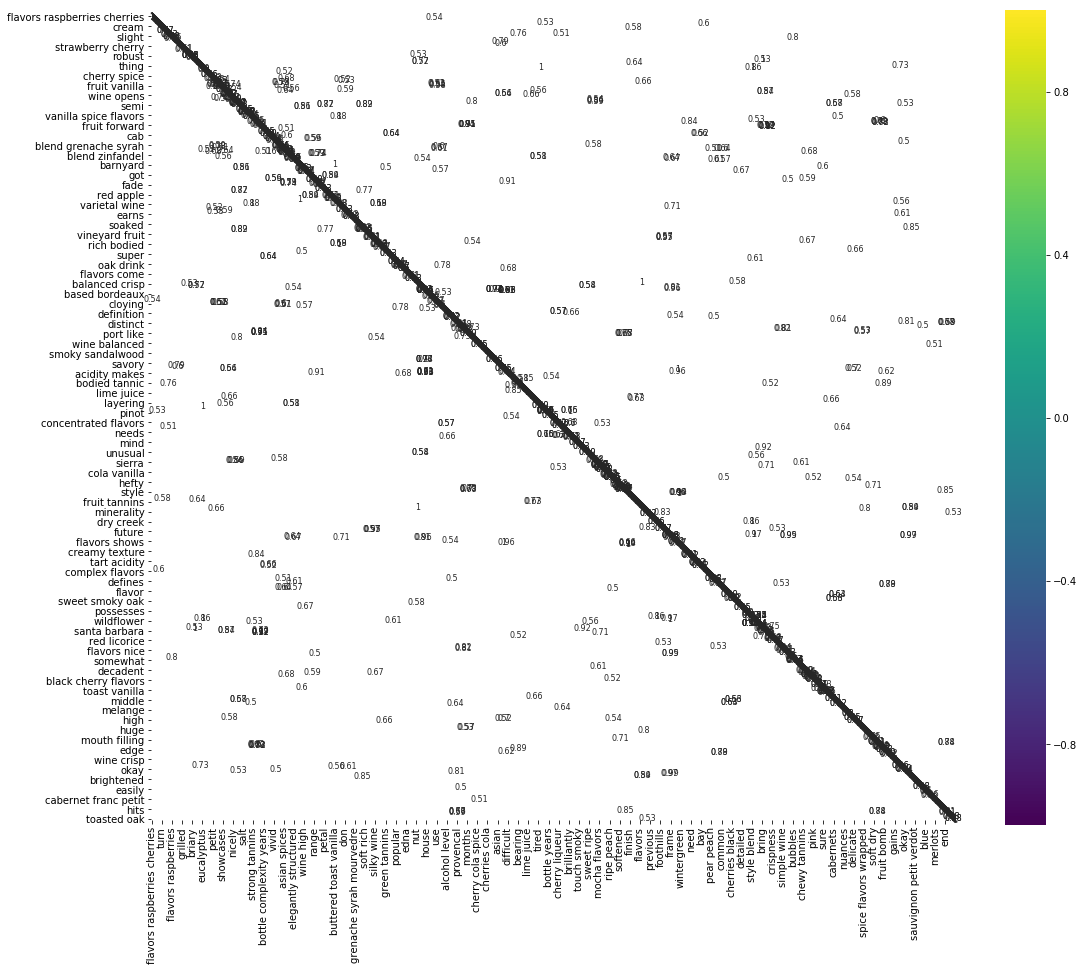

In [122]:
#Heatmap graph of corr 
corr2 = df_num.drop('label_score', axis=1).corr() # We already examined label score correlations
plt.figure(figsize=(18, 15))

sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [123]:
train_df2['label_score'].value_counts(normalize=False)

7     652
10    517
8     496
6     490
4     405
5     399
12    388
9     357
11    346
13    237
3     213
2     172
14    142
1      57
15     53
0      32
16     24
17     14
18      4
19      1
Name: label_score, dtype: int64

In [124]:
train_df3.apply(np.max)

wonderful                   0.359
robust                      0.417
infused                     0.359
new french                  0.365
currants chocolate          0.348
obvious                     0.557
medium bodied palate        0.392
layer                       0.447
flavors balanced            0.277
blend cabernet              0.338
cola sandalwood             0.277
little heavy                0.385
powerfully                  0.359
merlot                      0.438
modern                      0.267
pineapple orange            0.224
grenache syrah mourvedre    0.277
red                         0.333
price dry                   0.338
dry medium bodied           0.333
closed                      0.243
pure varietal               0.302
little soft                 0.516
relatively                  0.354
impresses                   0.408
roughly                     0.267
vanilla custard             0.329
old vines                   0.480
lot                         0.408
fairly        

In [125]:
print("Number of Reviews per Wine")
# Number of reviews per wine
reviews_per_wine = train_df2.groupby(["label_score"]).agg({
    "stews": pd.Series.nunique
})
reviews_per_wine.describe()


print("Number of Reviews per taste")
# Number of reviews per condition
reviews_per_sweetened = train_df2.groupby(["sweetened"]).agg({
    "stews": pd.Series.nunique
})

reviews_per_sweetened.describe()

Number of Reviews per Wine
Number of Reviews per Condition


,stews
count,5.000000
mean,3.000000
std,4.472136
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,11.000000


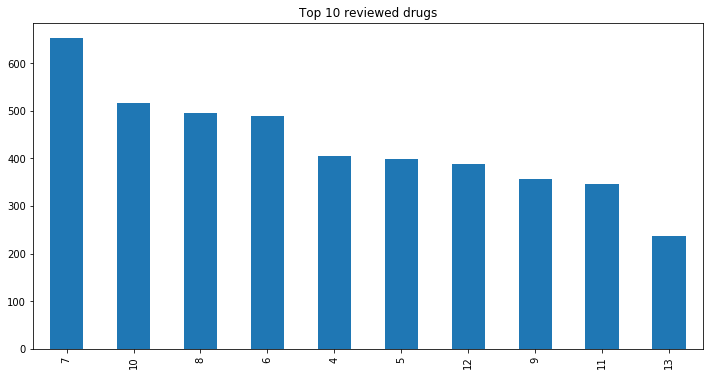

In [126]:
# Top 10 most reviewed wine
plot = train_df2.label_score.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

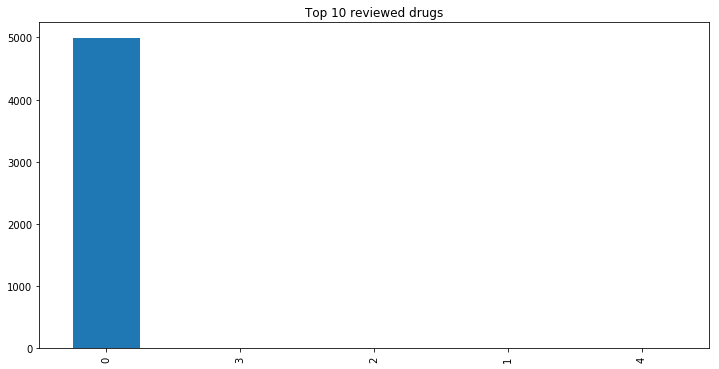

In [128]:
# Top 10 most reviewed sweetened
plot = train_df2.sweetened.value_counts().nlargest(10).plot(kind='bar', title="Top 10 reviewed drugs", figsize=(12,6))

In [129]:
#Label encoder calculation
from sklearn.preprocessing import LabelEncoder
#wine score
le = LabelEncoder()
le.fit(train_df2.label_score.drop_duplicates()) 
train_df2.label_score = le.transform(train_df2.label_score)
# sweetened or not
le.fit(train_df2.sweetened.drop_duplicates()) 
train_df2.sweetened = le.transform(train_df2.sweetened)


In [130]:
train_df2.corr()['label_score'].sort_values()

flavors nice               -0.257336
fairly                     -0.166727
plum flavors               -0.166612
cuts                       -0.160416
near                       -0.151283
appealing                  -0.149579
peach apricot              -0.138555
spices                     -0.132798
vanilla custard            -0.130192
low alcohol                -0.127038
citrus flavors             -0.124960
gamy                       -0.119468
little soft                -0.113230
yeast                      -0.110331
pepper cola                -0.110211
love                       -0.108906
relatively                 -0.108289
red licorice               -0.106894
dry table                  -0.103085
milk chocolate             -0.101858
inviting                   -0.099153
raspberry red              -0.097997
companion                  -0.095716
produced                   -0.094339
cherries plums             -0.093412
soft                       -0.091703
moist                      -0.090291
d

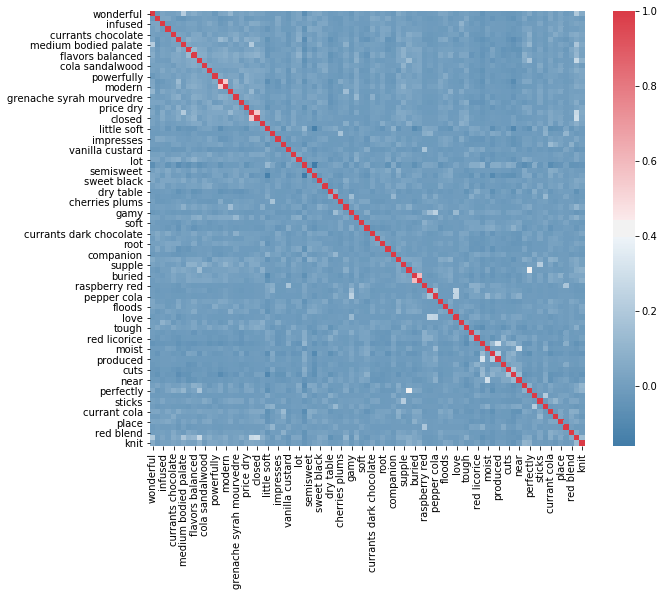

In [131]:
#heatmap deep corr graph
f, ax = plt.subplots(figsize=(10, 8))
corr = train_df3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

/.virtualenvs/bigdata/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/.virtualenvs/bigdata/lib/python3.5/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/.virtualenvs/bigdata/lib/python3.5/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/.virtualenvs/bigdata/lib/python3.5/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/.virtualenvs/bigdata/lib/python3.5/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/.virtualenvs/bigd

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

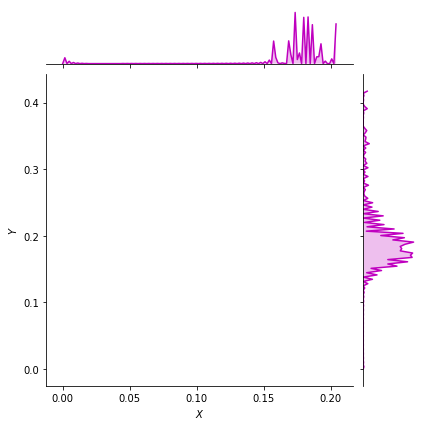

In [133]:
g = sns.jointplot(x="showing", y="stuff", data = train_df2[(train_df2.obvious == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

In [134]:
#Define MAE 
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [135]:
for col in train_df3:
  train_df3[col]

In [203]:
train_and_val_label.columns

Index(['85'], dtype='object')

In [255]:
# Prediction with two input variables

X = train_df3
y = train_and_val_label['85']#train_df2.loc[:,'label_score']

In [304]:
#Linear Regression Model
mae, mape = [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    #X = X.fillna(X.mean()) #is this ok?
    #print("Tur : ", i)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())
    #print("TurV2 : ", i)
    lm = linear_model.LinearRegression()
    model_1 = lm.fit(X_train, y_train)
    #print("TurV3 : ", i)
    test_predictions = model_1.predict(X_test)
    #print("TurV4 : ", i)
    mae.append(mean_absolute_error(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))
    #print("TurV5 : ", i)

print("Test MAE:", np.mean(mae))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_1.intercept_)
#combined = np.vstack((important_columns, model_1.coef_)).T
combined = np.empty((0, len(model_1.coef_)), dtype='f')

print(combined)

Tur :  1
TurV2 :  1
TurV3 :  1
TurV4 :  1
TurV5 :  1
Tur :  2
TurV2 :  2
TurV3 :  2
TurV4 :  2
TurV5 :  2
Tur :  3
TurV2 :  3
TurV3 :  3
TurV4 :  3
TurV5 :  3
Tur :  4
TurV2 :  4
TurV3 :  4
TurV4 :  4
TurV5 :  4
Tur :  5
TurV2 :  5
TurV3 :  5
TurV4 :  5
TurV5 :  5
Tur :  6
TurV2 :  6
TurV3 :  6
TurV4 :  6
TurV5 :  6
Tur :  7
TurV2 :  7
TurV3 :  7
TurV4 :  7
TurV5 :  7
Tur :  8
TurV2 :  8
TurV3 :  8
TurV4 :  8
TurV5 :  8
Tur :  9
TurV2 :  9
TurV3 :  9
TurV4 :  9
TurV5 :  9
Test MAE: 1.8722902468710647
Test MAPE: 2.125544086691307
Intercept: 87.15742460460439
[]


In [306]:
#Polynomial linear regrassion
from sklearn.preprocessing import PolynomialFeatures

X = X.fillna(X.mean())
#print("burda")
poly = PolynomialFeatures(degree=2, include_bias=False)
#print("burdaaa")
X_train_transform = poly.fit_transform(X)


mae, mape = [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X_train_transform, y, test_size=0.4)
    print(X_train.shape)
    print(y_train.shape)

    lm = linear_model.LinearRegression()
    model_4 = lm.fit(X_train, y_train)
    test_predictions = model_4.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_4.intercept_)
print(X);

(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
(2999, 3569)
(2999,)
Test MAE: 10905336498.012377
Test MAPE: 12263723371.917559
Intercept: 86.63691958133074
      wonderful  robust  infused  new french  currants chocolate  obvious  \
0                                                                           
1         0.000   0.000      0.0       0.000               0.000    0.000   
2         0.000   0.000      0.0       0.000               0.000    0.000   
3         0.000   0.000      0.0       0.000               0.000    0.000   
4         0.000   0.000      0.0       0.000               0.000    0.000   
5         0.000   0.000      0.0       0.000               0.000    0.000   
6         0.000   0.000      0.0       0.000               0.000    0.000   
7         0.000   0.000      0.0       0.000               0.000    0.000   
8         0.000   0.000      0

In [258]:
import xgboost as xgb

In [259]:
#X = train_df3.iloc[:,:-1]

In [260]:
y

0
1       92
2       86
3       87
4       88
5       93
6       90
7       92
8       87
9       84
10      96
11      84
12      92
13      96
14      84
15      90
16      91
17      84
18      84
19      90
20      90
21      93
22      91
23      92
24      92
25      86
26      85
27      88
28      86
29      88
30      86
        ..
4970    88
4971    89
4972    89
4973    91
4974    84
4975    91
4976    88
4977    89
4978    87
4979    89
4980    90
4981    90
4982    85
4983    84
4984    90
4985    84
4986    90
4987    94
4988    84
4989    87
4990    93
4991    92
4992    84
4993    93
4994    83
4995    86
4996    83
4997    88
4998    93
4999    86
Name: 85, Length: 4999, dtype: int64

In [261]:
X

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff,knit
0,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
2,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
3,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.209,0.209,0.000,...,0.0,0.000,0.0,0.000,0.209,0.000,0.0,0.000,0.000,0.000
4,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
5,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.169,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
6,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.143,0.0,0.000,0.000,0.143,0.0,0.000,0.000,0.143
7,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.196,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.196,0.000
8,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000
9,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000


In [262]:
X.shape, y.shape

((4999, 83), (4999,))

In [263]:
type(X)

pandas.core.frame.DataFrame

In [264]:
best_accurate_columns.keys()

Index(['wonderful', 'robust', 'infused', 'new french', 'currants chocolate',
       'obvious', 'medium bodied palate', 'layer', 'flavors balanced',
       'blend cabernet', 'cola sandalwood', 'little heavy', 'powerfully',
       'merlot', 'modern', 'pineapple orange', 'grenache syrah mourvedre',
       'red', 'price dry', 'dry medium bodied', 'closed', 'pure varietal',
       'little soft', 'relatively', 'impresses', 'roughly', 'vanilla custard',
       'old vines', 'lot', 'fairly', 'semisweet', 'zesty acidity',
       'sweet black', 'savory', 'dry table', 'spices', 'cherries plums',
       'purity', 'gamy', 'melon flavors', 'soft', 'citrus flavors',
       'currants dark chocolate', 'profile', 'root', 'blueberry', 'companion',
       'clean finish', 'supple', 'plummy', 'buried', 'buttered',
       'raspberry red', 'inviting', 'pepper cola', 'origins', 'floods',
       'cocktail', 'love', 'tannin structure', 'tough', 'appealing',
       'red licorice', 'flavors nice', 'moist', 'peach a

In [265]:
final_columns = best_accurate_columns.keys().ravel().tolist()
type(final_columns)

list

In [266]:
final_columns.remove('knit')

In [267]:
X1 = X[final_columns]
X1.shape

(4999, 82)

In [268]:
y.shape

(4999,)

In [269]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [270]:
#XGBRegressor Model
mae, mape = [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.4)
    print(X_train.shape)
    print(y_train.shape)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.9, learning_rate = 0.5, 
                              max_depth = 10, alpha = 10, n_estimators = 50)
    model_5 =xg_reg.fit(X_train,y_train)
    test_predictions = model_5.predict(X_test)
    
    mae.append(mean_absolute_error(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test MAPE:", np.mean(mape))
#print ("Intercept:", model_5.intercept_)
print(X);

(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
(2999, 82)
(2999,)
Test MAE: 2.015515528784858
Test MAPE: 2.2885070079860017
      wonderful  robust  infused  new french  currants chocolate  obvious  \
0                                                                           
1         0.000   0.000      0.0       0.000               0.000    0.000   
2         0.000   0.000      0.0       0.000               0.000    0.000   
3         0.000   0.000      0.0       0.000               0.000    0.000   
4         0.000   0.000      0.0       0.000               0.000    0.000   
5         0.000   0.000      0.0       0.000               0.000    0.000   
6         0.000   0.000      0.0       0.000               0.000    0.000   
7         0.000   0.000      0.0       0.000               0.000    0.000   
8         0.000   0.000      0.0       0.000               0.000    0.000   
9

In [271]:
#Lasso linear Regression
mae, mape = [], []

for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    print(X_train.shape)
    print(y_train.shape)
    
    predictor_cols = [col for col in X_train 
                  if col != 'label_score']
    
    clf = linear_model.Lasso(alpha=1, max_iter=100000)
    model_6 = clf.fit(X_train[predictor_cols], y_train)
    test_predictions = model_6.predict(X_test[predictor_cols])
    
    mae.append(mean_absolute_error(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model_6.intercept_)
print(X);

(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
(2999, 83)
(2999,)
Test MAE: 2.78211685376607
Test MAPE: 3.166863134113734
Intercept: 87.91030343447817
      wonderful  robust  infused  new french  currants chocolate  obvious  \
0                                                                           
1         0.000   0.000      0.0       0.000               0.000    0.000   
2         0.000   0.000      0.0       0.000               0.000    0.000   
3         0.000   0.000      0.0       0.000               0.000    0.000   
4         0.000   0.000      0.0       0.000               0.000    0.000   
5         0.000   0.000      0.0       0.000               0.000    0.000   
6         0.000   0.000      0.0       0.000               0.000    0.000   
7         0.000   0.000      0.0       0.000               0.000    0.000   
8         0.000   0.000      0.0       0.000       

In [272]:
# Cross validation with a single line
X1 = X1.fillna(X1.mean()) #!!! Test data is used in the mean
result = cross_val_score(model_5, X1, y, scoring="neg_mean_absolute_error", cv = 10)
print(result)

[-1.8985065  -2.01037479 -2.05476746 -1.92469795 -1.97189162 -1.91867664
 -1.95265359 -2.01101683 -1.95260277 -1.82517421]


In [273]:
result2 = result.mean()*100
result2

-195.2036235404158

In [274]:
X1.shape, y.shape

((4999, 82), (4999,))

In [275]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [276]:
#GridSearch to determine best parameters
param_grid = {
    'n_estimators': [50, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
#print("Burda")
grid_search_model = GridSearchCV(estimator=model_5, param_grid=param_grid, cv=5, refit=True)
#print("Burdaa")
grid_search_model.fit(X1, y)
#print("Burdaaa")
print(grid_search_model.best_estimator_)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=10, max_features='auto', min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [ ]:
#Upload test from local to colabs area
uploaded = files.upload()

In [277]:
# Load Test dataset
test_df = pd.read_csv("testData.csv", index_col=0)
test_df.head(5).append(test_df.tail(5))

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2965,0.0.2966,0.0.2967,0.0.2968,0.0.2969,0.0.2970,0.0.2971,0.0.2972,0.0.2973,0.0.2974
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.167,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0


In [278]:
test_df.shape

(4999, 3000)

In [279]:
len(top_corr_columns), len(golden_features_list), len(best_accurate_columns)

(3000, 50, 83)

In [280]:
len(X1.columns)

82

In [281]:
final_columns

['wonderful',
 'robust',
 'infused',
 'new french',
 'currants chocolate',
 'obvious',
 'medium bodied palate',
 'layer',
 'flavors balanced',
 'blend cabernet',
 'cola sandalwood',
 'little heavy',
 'powerfully',
 'merlot',
 'modern',
 'pineapple orange',
 'grenache syrah mourvedre',
 'red',
 'price dry',
 'dry medium bodied',
 'closed',
 'pure varietal',
 'little soft',
 'relatively',
 'impresses',
 'roughly',
 'vanilla custard',
 'old vines',
 'lot',
 'fairly',
 'semisweet',
 'zesty acidity',
 'sweet black',
 'savory',
 'dry table',
 'spices',
 'cherries plums',
 'purity',
 'gamy',
 'melon flavors',
 'soft',
 'citrus flavors',
 'currants dark chocolate',
 'profile',
 'root',
 'blueberry',
 'companion',
 'clean finish',
 'supple',
 'plummy',
 'buried',
 'buttered',
 'raspberry red',
 'inviting',
 'pepper cola',
 'origins',
 'floods',
 'cocktail',
 'love',
 'tannin structure',
 'tough',
 'appealing',
 'red licorice',
 'flavors nice',
 'moist',
 'peach apricot',
 'produced',
 'milk cho

In [282]:
type(test_df)

pandas.core.frame.DataFrame

In [283]:
test_df2 = test_df.copy()

In [284]:
test_df2.columns = fd

In [285]:
test_df2.head(2)

,flavors raspberries cherries,cherry cocoa,age years,different,marmalade,ready,darker,long spicy,grass,wine finishes,...,quaffable,scoury,moist earth,syrah petite,continue,gives,white pepper flavors,toasted oak,dominates,stews
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
test_df2.shape

(4999, 3000)

In [287]:
final_columns_test = best_accurate_columns.keys().ravel().tolist()
type(final_columns_test)

list

In [288]:
final_columns_test.remove('knit')

In [290]:
test_df_final = test_df2[final_columns_test]

In [291]:
test_df_final.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,perfectly,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.209,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.177,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [292]:
test_df_final.shape

(4999, 82)

In [293]:
#Determine datasets for real  prediction
X_train_dataset = X1#train_df3.loc[:,'label_score'][: -1]
X_test_dataset = test_df_final
Y_train_dataset = y#train_df2.loc[:,'label_score']
X_train_dataset = X_train_dataset.fillna(X_train_dataset.mean())
Y_train_dataset = Y_train_dataset.fillna(Y_train_dataset.mean())
print(X_train_dataset.shape)
print(X_test_dataset.shape)

(4999, 82)
(4999, 82)


In [294]:
X_train_dataset.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,perfectly,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
X_test_dataset.head(2)

,wonderful,robust,infused,new french,currants chocolate,obvious,medium bodied palate,layer,flavors balanced,blend cabernet,...,perfectly,yeast,sticks,low alcohol,currant cola,powerful,place,dry fruity,red blend,stuff
0,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.209,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.177,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0


In [296]:
#Set XGBRegressor parameters from gridsearchCV
final_xg_reg = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=10, max_features='auto', min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [297]:
#Prediction Step
final_model =final_xg_reg.fit(X_train_dataset,Y_train_dataset)
predictions = final_model.predict(X_test_dataset)

In [298]:
print(predictions)

[88.566154 84.91092  85.409004 ... 87.36544  85.32224  84.03037 ]


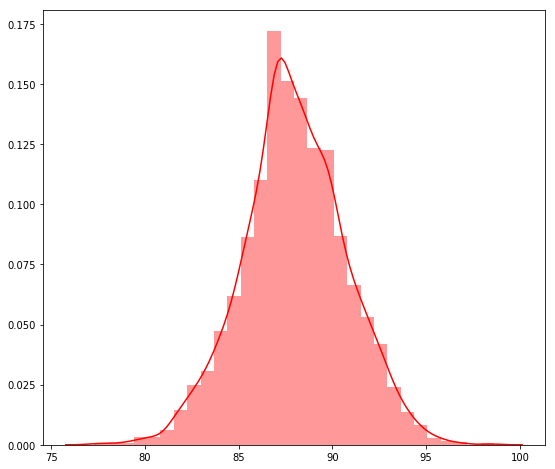

In [300]:
#Plot predictions
plt.figure(figsize=(9, 8))
sns.distplot(predictions, color='r', bins=30, hist_kws={'alpha': 0.4});

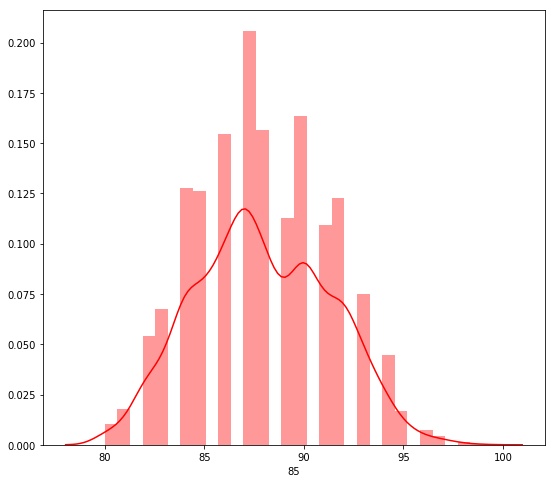

In [303]:
#Plot test data set
plt.figure(figsize=(9, 8))
sns.distplot(y, color='r', bins=30, hist_kws={'alpha': 0.4});

In [307]:
result_df = pd.DataFrame()

In [313]:
test_df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', name='0', length=4999)

In [314]:
result_df['Id'] = test_df.index

In [315]:
result_df['prediction'] = predictions

In [316]:
result_df.head(2)

,Id,prediction
0,1,88.566154
1,2,84.910919


In [317]:
#Export dataframe as a csv
result_df.to_csv("wine_predict_results.csv", index=0)